# **Sesión 2. Módulo 2.**  
# **Python Scientific Stack**  

El término **Python Scientific Stack** es una manera genérica de referirse al conjunto de liberías de python que se utilizan en el contexto científico. Más especificamente, denota librerias orientadas a la manipulación, modelización, visualización y análisis de grandes cantidades de datos (aunque no se quejan si les proporcionamos los datos en pequeñas cantidades!).

Las librerías principales que se engloban dentro de este término son numpy, scipy, pandas, matplotlib, seaborn, y scikit. Hay muchas más tan importantes como las anteriores en determinados contextos, pero en este curso nos vamos a centrar en adquirir una perspectiva general de las dos librerías que podrían ser de más utilidad en el ámbito de la psicología: pandas y seaborn. 

Sin embargo, hay una librería fundamental a todo el trabajo computacional que se hace en python que es necesario conocer: numpy.

## **1. NumPy**  

NumPy (Numerical Python) es una biblioteca de código abierto que representa el estándar para trabajar con datos  masivos en Python. Por esto es el núcleo del ecosistema científico en Python, permitiendo implementar algoritmos numéricos a una velocidad comparable a código C o FORTRAN.    

### **1.1 NumPy Arrays**  

Los arrays de NumPy forman la estructura de datos subyacente para la mayor parte del trabajo computacional en Python, y Pandas lo utiliza de forma extensiva. Aquí sólo daremos una breve visión general.

Un array es una malla de valores homogéneos que además contiene información (metadatos) sobre los datos en bruto, cómo localizar un elemento, y cómo interpretar un elemento.  

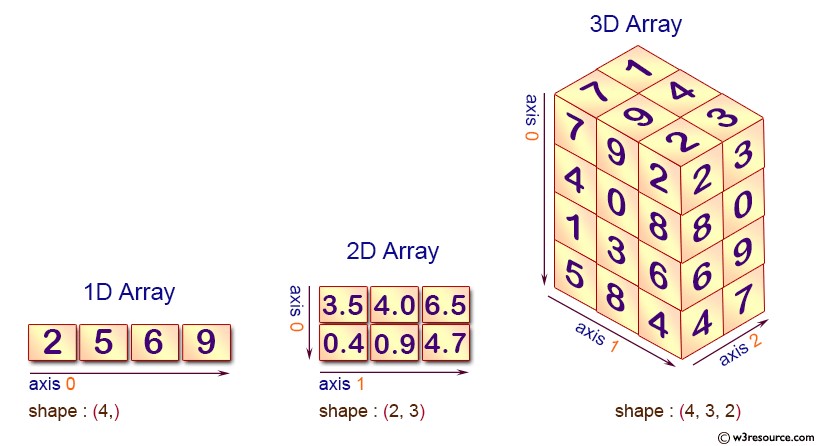

Un array puede ser indexado por una tupla de enteros no negativos, por booleanos, por otro array o por enteros. El **rango (range)** de la matriz es el número de dimensiones. La **forma (shape)** de la matriz es una tupla de enteros que indica el tamaño de la matriz en cada dimensión. En NumPy, las dimensiones se llaman **ejes (axes)**. 

### **1.2. ¿Cuál es la diferencia entre una lista Python y un array NumPy?**  

Mientras que una lista Python puede contener diferentes tipos de datos dentro de una misma lista, todos los elementos de un array NumPy deben ser homogéneos. 

Los arrays de NumPy son más rápidos y compactos que las listas de Python. Un array consume menos memoria y es cómodo de usar. Vamos a comprobando calculando el cuadrado de un vector:

In [ ]:
import random
import numpy as np

vector_py = [random.random() for i in range(50000)]
vector_np = np.random.random(50000)


In [ ]:
%timeit [e**2 for e in vector_py]

In [ ]:
%timeit vector_np**2

In [ ]:
print("Por tanto, la potenciación de matrices en numpy es %d veces más rápida que utilizando pure python" % (8.58e-3 / 33.2e-6) )

### **1.3. ¿Cómo crear arrays NumPy?**  
En primer lugar debemos importar la librería NumPy para poder utilizarla. La convención para importarla es la siguiente:

In [ ]:
import numpy as np

Una vez importado, podemos acceder a sus funciones como miembros del nombre `np`

La manera más básica de crear un array NumPy, es utilizar la función `np.array()`, que toma una lista como valor de entrada.

In [ ]:
a = np.array([1, 2, 3])
a

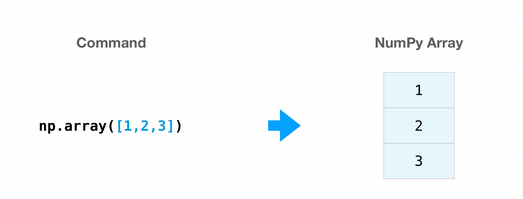

Existen muchos otros métodos para crear arrays. A continuación veremos ejemples utilizando las funciones `np.zeros()`, `np.ones()`, `np.empty()`, `np.arange()`, `np.linspace()`

In [ ]:
np.zeros(2)

In [ ]:
np.zeros([2,3])

In [ ]:
np.ones(2)

In [ ]:
np.empty(2) 

In [ ]:
np.arange(4)

In [ ]:
np.arange(2, 9, 2)

In [ ]:
np.linspace(0, 10, num=5)

In [ ]:
np.ones(2, dtype=np.int64)

### **1.4. Propiedades más relevantes de NumPy arrays**  

Un array es un objeto complejo con una larga lista de métodos y propiedades. En esta sección veremos simplemente las propiedades más fundamentales de un array: `ndim`, `size`, `shape`.  Para ello utilizaremos un array de ejemplo creado en la siguiente celda.  

In [ ]:
array_example = np.array([[[0, 1, 2, 3],

                           [4, 5, 6, 7]],

                          [[0, 1, 2, 3],

                           [4, 5, 6, 7]],

                          [[0 ,1 ,2, 3],

                           [4, 5, 6, 7]]])
array_example

In [ ]:
array_example.ndim

In [ ]:
array_example.size

In [ ]:
array_example.shape

### **1.5. Indexado y recortado (slicing) de NumPy arrays**  

Puedes indexar y cortar arrays NumPy de la misma forma que las listas Python.

In [ ]:
data = np.array([1, 2, 3])
data[1]

In [ ]:
data[0:2]

In [ ]:
data[1:]

In [ ]:
data[-2:]

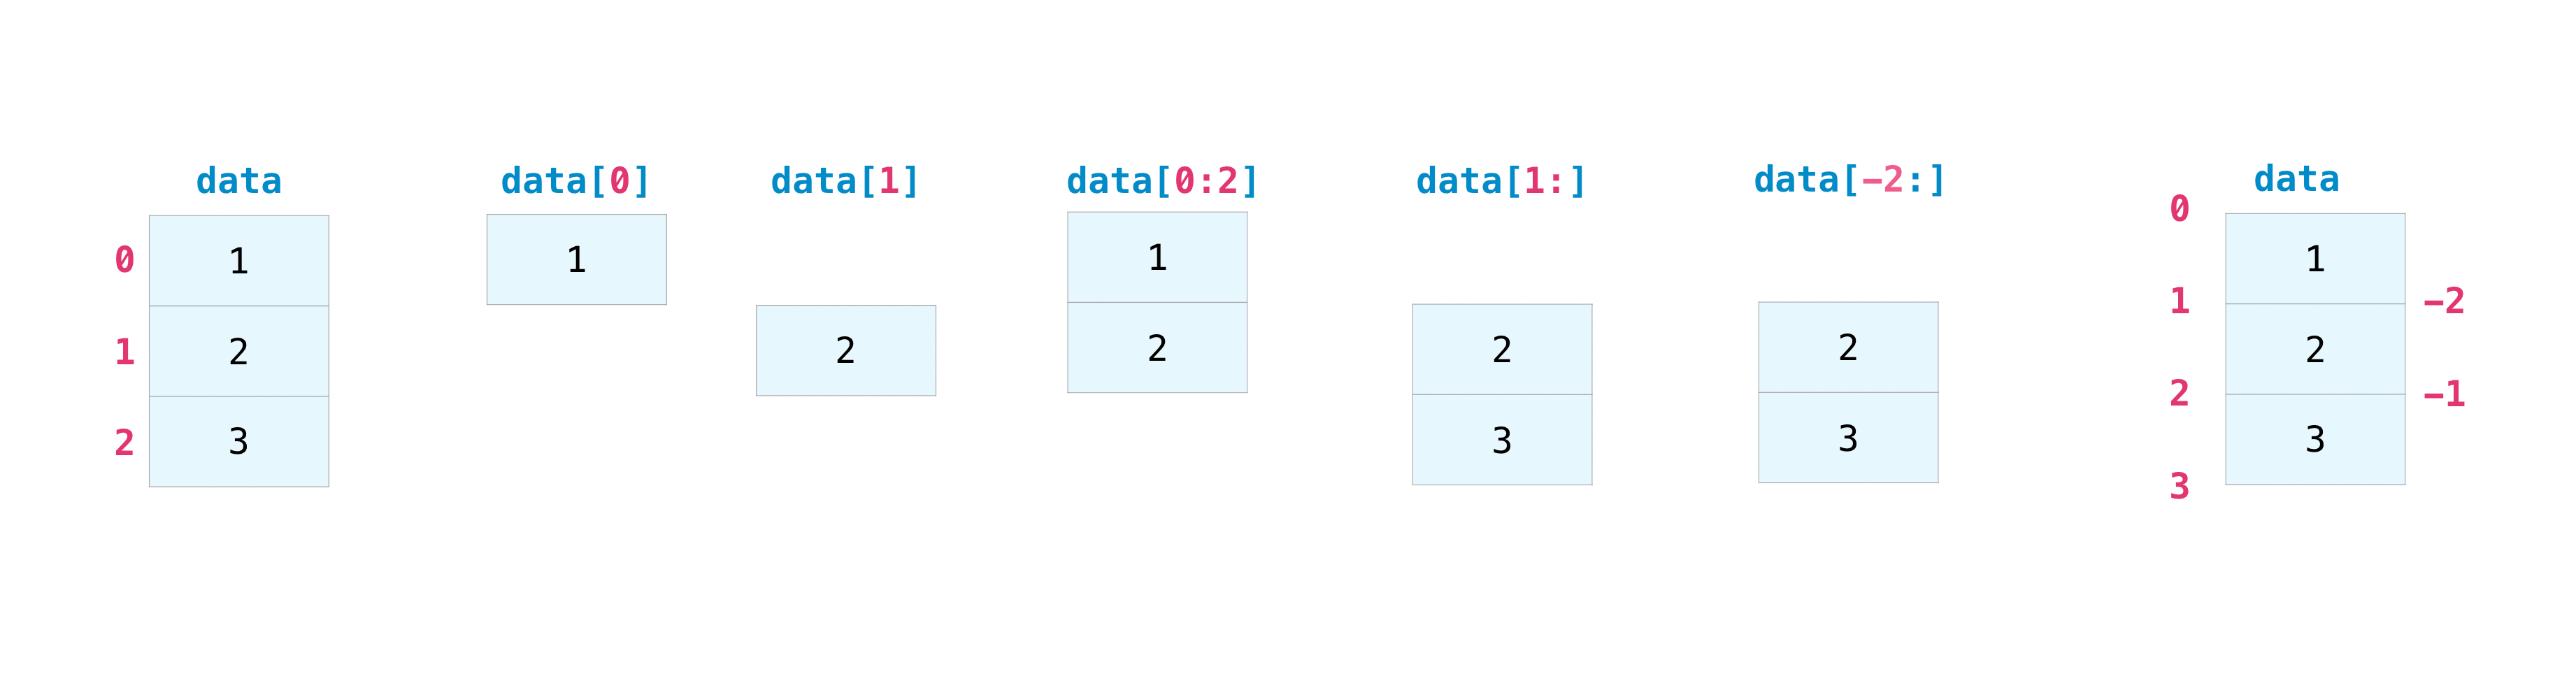

### **1.6. Operaciones más utiles con NumPy arrays**  

NumPy también realiza funciones de agregación. Además de `min`, `max`, y `sum`, puede ejecutar fácilmente `mean` para obtener la media, `prod` para obtener el resultado de multiplicar los elementos juntos, `std` para obtener la desviación estándar, y más.

In [ ]:
data.max()

In [ ]:
data.min()

In [ ]:
data.sum()

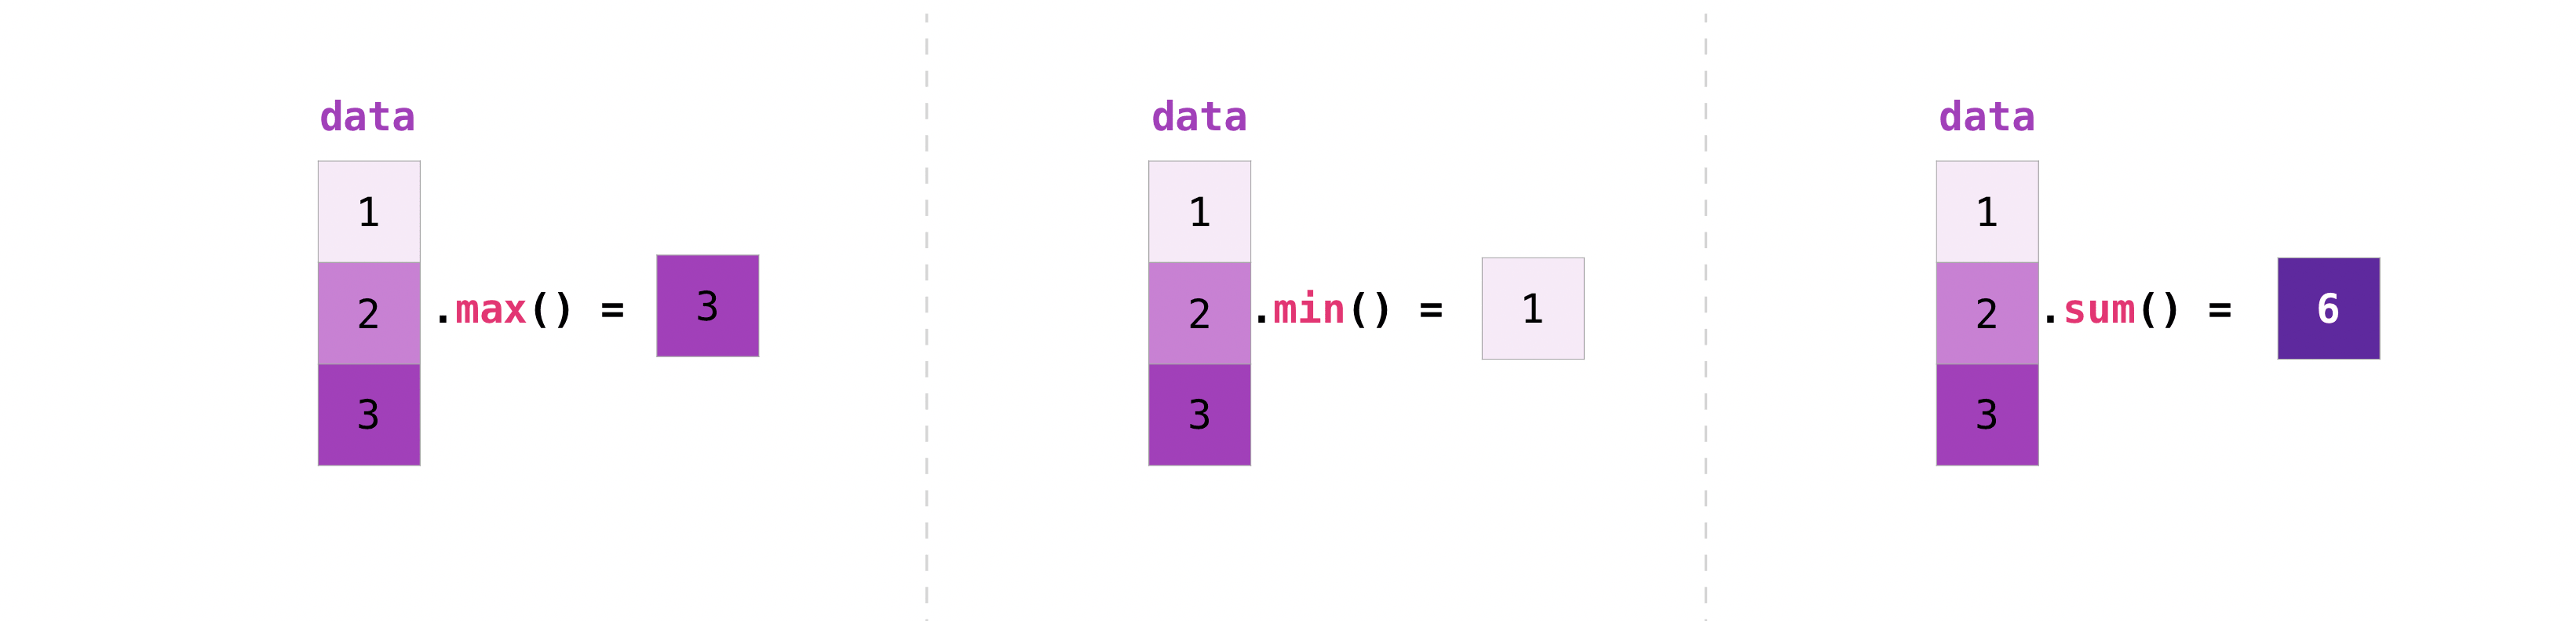

Para mostrar mejor la utilidad de estos métodos, vamos a partir de un array un poco más interesante.

In [ ]:
a = np.array([[0.45053314, 0.17296777, 0.34376245, 0.5510652],
              [0.54627315, 0.05093587, 0.40067661, 0.55645993],
              [0.12697628, 0.82485143, 0.26590556, 0.56917101]])

In [ ]:
a.sum()

In [ ]:
a.min()

In [ ]:
a.min(axis=0)

In [ ]:
a.min(axis=1)

In [ ]:
a.mean(axis=1)

In [ ]:
a.std(axis=1)

## **2. Pandas: `DataFrames` y `Series`**  
Pandas es una biblioteca útil para el análisis de datos. Para ello, Pandas proporciona dos estructuras de datos potentes y relativamente fáciles de usar: `DataFrames` y `Series`.

Para poder utilizar las funciones de la librería Pandas, antes debemos importarla al igual que numpy. La convención para hacerlo es:

In [ ]:
import pandas as pd
import numpy as np

Una vez importada, podemos acceder a sus funciones como miembros del nombre `pd`.

### **2.1. ¿Qué es un Pandas DataFrame?**

Un DataFrame de Pandas es básicamente una tabla de datos, en la que las columnas representab distintas variables, y las filas los distintos casos de cada variable. Por esto, los DataFrames son la estructura de datos básica para el trabajo estadístico con datos.  

In [ ]:
df = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20220102'),
                    'C' : np.random.randn(6),
                    'D' : np.array([3] * 6,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train","test","train"]),
                    'F' : 'foo' })
df

Los `DataFrames` soportan el uso de fechas como índices, lo que facilita enormemente el uso de datos longitudinales:

In [ ]:
dates = pd.date_range('20210101',periods=6)
df = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20220102'),
                    'C' : np.random.randn(6),
                    'D' : np.array([3] * 6,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train","test","train"]),
                    'F' : 'foo' },
                  index = dates )
df

Cada una de estas columnas tiene su tipo de datos, como podemos comprobar accediendo a la propiedad `dtypes` del `DataFrame`:

In [ ]:
df.dtypes

### **2.2. ¿Qué es un Pandas `Series`?**  

Una serie es una estructura de datos unidimensional, puede entenderse como cada una de las columnas de una tabla. Su nombre proviene de la series temporales. 

Puede contener cualquier tipo de datos:  enteros, flotantes y cadenas. Es útil cuando se desea realizar un cálculo o devolver un vector unidimensional. Una serie, por definición, no puede tener múltiples columnas. Para este caso existe el `DataFrame`.

In [ ]:
pd.Series([1., 2., 3.])

De manera análoga a los `DataFrames`, las `Series` de Pandas soportan el uso de fechas como índices:

In [ ]:
dates = pd.date_range('20210101',periods=6)
pd.Series(np.random.randn(6),index=dates,dtype='float32')

### **2.3. Visualización de los datos**  

Pandas posee muchos métodos comunes (o similares) con el lenguaje R para visualizar y manipular datos. En general en Pandas se accede a éstos utilizando la notación `.`, es decir, son literalmente métodos de los `DataFrames` y `Series`. 

Por ejemplo, para mostrar las primeras filas de una tabla usamos el método `head`:

In [ ]:
df.head()

Y para mostrar las últimas filas de una tabla usamos el método `tail`, en este caso le pasamos un parámetro para poder especificar cuantas lineas queremos visualizar:

In [ ]:
df.tail(3)

También son propiedades de las `Series` y `DataFrames` el índice, las columnas o los valores subyacentes a la tabla:

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.values

Podemos acceder a un breve resumen de los datos presentes en un `DataFrame` accediendo a su método `describe`

In [ ]:
df.describe()

Igualmente hay multiples formas de ordenar los datos de un `DataFrame`, en este ejemplo lo hacemos en función de los valores de una columna, en orden creciente:

In [ ]:
df.sort_values('C')

### **2.4. Selección de los datos**  

El indexado de `DataFrames` en Pandas es un tema avanzado ya que es uno de los puntos fuertes de esta librería. Pandas ofrece múltiples posibilidades, algunas de ellas muy sofisticadas. Aqui vamos a ver tres maneras sencillas de acceder a columnas, filas, o subconjuntos de filas y columnas.

En primer lugar, podemos utilizar el `DataFrame` como un diccionario para obtener una o varias columnas (cada columna por separado es una `Series`):

In [ ]:
df['A']

In [ ]:
df[['B','C']]

Para seleccionar una o varias filas, podemos utilizar los valores del índice del `DataFrame`: 

In [ ]:
df['20210101':'20210101']

In [ ]:
df['20210101':'20210103']

Para concluir esta breve sección, podemos seleccionar partes de un `DataFrame` utilizando posiciones numéricas en sus dos dimensiones utilizando el método `iloc`:

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3:5,0:2]

In [ ]:
df.iloc[:,1:3]

### **2.5. Indexado booleano**  

Un método alternativo muy potente para seleccionar datos en un `DataFrame` es utilizar indexado booleano. Es un método heredado de NumPy. Para entender cómo funciona primero debemos ver cómo funcionan las comparaciones en objetos `DataFrame` o `array`.

Si aplicamos un operador de comparación a un `DataFrame` obtendremos un `DataFrame`  booleano con la misma forma que el original pero con valores `True` o `False` en función de si cada posición cumple o no la condición. Este método sólo funciona en `DataFrames` con valores numéricos, así que primero seleccionaremos las columas numéricas de nuestra tabla. Por ejemplo:

In [ ]:
df2 = df[['A', 'C', 'D']]
df2 > 0

Ahora podemos utilizar el `DataFrame` booleano para indexar el original y obtener los valores que cumplen la condición

In [ ]:
df[df2 > 0]

## **3. Seaborn**  

Seaborn es una biblioteca para hacer gráficos estadísticos en Python. Se basa en matplotlib y se integra estrechamente con las estructuras de datos de pandas.

Seaborn es muy útil para explorar y comprender tus datos. Sus funciones de ploteo operan en `DataFrames` y numpy `arrays` realizando internamente el mapeo semántico y la agregación estadística necesarios para producir gráficos informativos. 

Su API declarativa orientada a `DataFrames` le permite centrarse en el significado de los distintos elementos de sus gráficos, en lugar de en los detalles de cómo dibujarlos.

Para hacer uso de esta biblioteca debemos importarla de la siguiente forma:

In [ ]:
# Import seaborn
import seaborn as sns


La biblioteca seaborn se organiza en tres módulos principales que se ocupan de realizar tres tipos categóricamente distintos de representaciones de los datos:
* **relational plots (función relplot)**  
* **distribution plots (función displot)**  
* **categorical plots (función catplot)**  

Además de los distintos módulos, existe una clasificación transversal de las funciones seaborn como "a nivel de ejes" o "a nivel de figuras". La organización se parece un poco a esto:

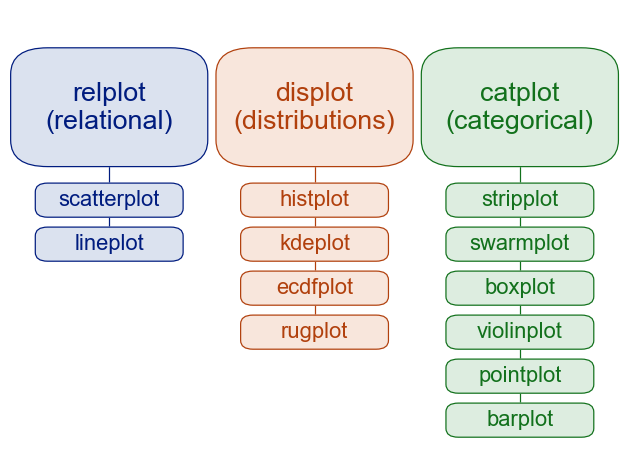

### **3.1. Relational plots**

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip")

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip",size="size", sizes=(15, 200))

In [ ]:
fmri = sns.load_dataset("fmri")

In [ ]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue="event")

### **3.2. Distribution plots**

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

### **3.3. Categorical plots**

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex",kind="violin", split=True)

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

In [ ]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

### **3.4. Multiview plots**

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

In [ ]:
sns.pairplot(data=penguins, hue="species")

In [ ]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

## **4. Análisis de datos**

## **4.1. Estadística descriptiva**

In [ ]:
titanic.describe()

In [ ]:
titanic.groupby('sex').describe()

In [ ]:
titanic.groupby('pclass').describe()

In [ ]:
titanic.groupby(['sex','pclass']).describe().T

## **4.2. Inferencia estadística: t-test**

In [ ]:
from scipy.stats import ttest_ind

cat1 = titanic[titanic['sex']=='male']
cat2 = titanic[titanic['sex']=='female']

ttest_ind(cat1['survived'], cat2['survived'])

In [ ]:
from scipy.stats import ttest_ind
ttest_ind?

## **4.3. Inferencia estadística:  ANOVA de medidas repetidas**

Python permite múltiples análisis estadísticos. Veremos una pequeña muestra de la gran variedad de librerías y métodos estadísticos existentes. Recientemente se han incorporado varios métodos para hacer analisis de varianza de medidas repetidas. En este caso vamos a utilizar la librería pingouin para analizar un conjunto de datos simulado de un estudio longitudinal acerca de los efectos de la meditación en los resultados de una puntuación obtenida en un test.

Comenzamos leyendo el conjunto de datos del disco duro. Los datos están almacenados en un archivo csv, y utilizaremos la librería pandas para leerlo. Esta librería permite el manejo de tablas de datos, y es la base sobre la que trabaja la librería seaborn.

In [ ]:
import pandas as pd
import pingouin as pg
import seaborn as sns

meditation = pd.read_csv('../datasets/meditation.csv')
meditation

A continuación generamos una tabla con estadísticas descriptivas y representamos gráficamente

In [ ]:
print(meditation.groupby(['Time', 'Group']).agg(['mean', 'std']))

sns.pointplot(data=meditation, x='Time', y='Scores', hue='Group', dodge=True,
              markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')

Gracias a que tanto pingouin como seaborn se basan en pandas, la sintaxis para expresar modelos estadísticos es muy similar a la que utilizamos para representar gráficamente los datos. Un sencillo e intuitivo comando nos permite realizar el ANOVA de medidas repetidas.

In [ ]:
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group',
                     subject='Subject', data=meditation)
pg.print_table(aov)

#### De manera similar, podemos realizar los análisis posthoc

In [ ]:
posthocs = pg.pairwise_tests(dv='Scores', within='Time', between='Group',
                             subject='Subject', data=meditation)
pg.print_table(posthocs)

## **4.4. Usando R desde ipython/jupyter notebooks**

In [ ]:
import pandas as pd
data = pd.read_csv("../datasets/punch_data.csv").query("stim")
data_corr = data.query("correct").copy()
data_resp = data.query("answered").copy()

def remove_intercept_variance(x, group_median):
    return x - x.median() + group_median

data_corr.loc[:, "rt_within"] = data_corr.groupby("subj").rt.transform(
    remove_intercept_variance,
    data_corr.rt.median(),
)


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R 
library(lme4)
lr.test = function(m1, m2, name){
    print(summary(m1))
    out = anova(m1, m2)
    chi2 = out$Chisq[2]
    dof = out$"Chi Df"[2]
    p = out$"Pr(>Chisq)"[2]
    test_str = "\nLikelihood ratio test for %s:\n  Chisq(%d) = %.2f; p = %.3g"
    writeLines(sprintf(test_str, name, dof, chi2, p))
}

In [ ]:
%%R -i data
data$log.cpe = log(data$pe_context)
data.corr = data[data$correct,]
data.corr$log.cpe = log(data.corr$pe_context)
data.resp = data[data$answered,]
data.resp$log.cpe = log(data.resp$pe_context)
summary(data.resp)


In [ ]:
cpe_separation = pd.read_csv('../datasets/cpe_separation.csv')

In [ ]:
%R -i cpe_separation

In [ ]:
%%R
m <- lmer(dist ~ cpe + (cpe | subj), cpe_separation, subset=roi=="IFS")
m.null <- lmer(dist ~ 1 + (cpe | subj), cpe_separation, subset=roi=="IFS")
lr.test(m, m.null, "main effect of CPE on IFS pattern distance")

In [ ]:
%%R
library(dplyr)
summary(iris)


In [ ]:
%%R
library(ggplot2)
ggplot(data=iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point(size=3)

## **4.5. Cálculo simbólico**

Resolución de sistemas de ecuaciones lineales con sympy. En este ejemplo se calcula la solución al sistema de ecuaciones:  

   x + 4 y ==  2  
   
-2 x +   y == 14  

In [ ]:
from sympy import Matrix, solve_linear_system
from sympy.abc import x, y

system = Matrix(( (1, 4, 2), (-2, 1, 14)))
solve_linear_system(system, x, y)

Sympy tambien puede resolver ecuaciones diferenciales, como por ejemplo el oscilador armónico:  

In [ ]:
from sympy import Function, Eq, dsolve, symbols
from sympy import sin, cos, exp
from sympy.plotting import plot, plot3d

y = Function('y')
t, mu = symbols(['t','mu'])

equation = Eq(y(t).diff(t, t) + y(t), 0)
equation

In [ ]:
solution = dsolve(equation, y(t))
solution

In [ ]:
import numpy as np
plot1 = plot(show=False)
for c1 in np.linspace(-2,2,10):
    plotc1 = plot(solution.subs({'C1': c1, 'C2': 0.2}).rhs, (t, -10, 10), show=False)
    plot1.append(plotc1[0])
plot1.show()